In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, UpSampling2D, InputLayer

from typing import Dict, List, Tuple


In [2]:
# Check that TF 2.1.0 is in use
print(tf.__version__)

2.3.0


# For turn-in move all answers to questions and requested plots to top of notebook or this will not be graded. Also make a final clean run of your code so the cells execute in order.

### Points awarded for correct working models, questions, and plots.

[+10 per model correct and working -5 for failure on either]

**1.1 Answer the following questions:**
1.   Explain the indication of overfitting and how this occurs (provide plot supporting your answer)? [+4 answer, +4 plot, +2 answer and plot agree]
 
    For training data, the loss drops to a low level and the accuracy increases to a high level. For validation data, the loss may not keep dropping in general and may remain high. Loss and accuracy tend to plateau fast within several epoches.
    
    ![](overfit_train.png)
    
    ![](overfit_valid.png)
    

2.   Explain how overfit can hinder performance of a model when deployed. [+6 answer]
    
    Overfitted model will predict poorly when using new data not close to the training data.

3.   Name two ways to avoid this. [+2 answer, +2 answer]

    (1) Use regularization. (2) Add a dropout layer

**1.2 Answer the following question:** 
 1.   Explain how dropout affected your loss (provide plot supporting your answer). [+5 answer, +5 plot]
 
     When add dropout layer(s) to the model, the loss for the validation data in general keeps dropping and eventually reach a lower level than that without the dropout layer(s). 
     
     When the dropout layer is added immediately after the input layer, the loss fluctuates a lot after reaching a low level (learning is basically done). When the dropout layer is added after convolutional layers and dense layers, the loss fluctuates less after reaching a low level, and the final loss level is lower. 
     Discussion about the two cases: when add a dropout layer after the input layer, we are essentially dropping observations/examples for each update. In other words, for each update, the network is trained over a randomly selected subsample of the training data. This leads to less efficient learning and the weights still fluctuate a lot after the loss is already low simply because the training data fed to the network is different per update.
     When add dropout layers after convolutional layers and dense layers, each update uses the same training data. Dropout layers serve to prevent over-fitting and do not result in over-fluctuation of the loss.
     
     ![](improve2_train.png)
     ![](improve_valid.png)

**Bonus Answer the following question:**
    
  1. Considering that encoder and decoder can be constructed as separate components, trained as a single unit, and then separated for use . What uses can you brainstorm?  [+5 bonus makeup points]
  
  The encoder enables the machine to learn the "essential" features of the data. So it can be used to classify styles/genres of artworks, music, etc.

**2.1 Linear AE points for constructed model, no questions here.**

**2.2 Convolutional AE points for constructed model, no questions here.**

**2.3 Report histogram plot, mean and std. dev. of normal data, and confusion matrix for 2 standard deviations as results. Discuss your loss plot.** [+10 for greater than 75 TP, +10 all else]

![](anomaly_loss.png)

![](anomaly_hist.png)

    Loss for both training and validation data keeps dropping and reaches rather low level. 
    
    The mean and std.dev of the normalized (minmaxscaler) normal data are 0.0047 and 0.0004 respectively.
    The mean and std.dev of the original normal data are 0.2284 and 0.0199 respectively.
    
    Confusion matrix: 
    
    TP 128 	 FP 128
    FN 15 	 TN 872
    

    
    

***Reminder: Achieve better than 75 anomalies***

In [2]:
#Import dataset and normalize to [0,1]
mnist = tf.keras.datasets.mnist
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()
#Normalize

# ------------------ I am practicing OOD below------------------

In [3]:

#Reshape and normalize

class Preparation:
    def __init__(self):
        self.input: Tuple
        self.labels: Tuple
      
    
    def DataPrep(self, data):
        self.input = data.reshape(data.shape[0],28,28,1)
        self.input = self.input.astype('float32')
        self.input /= 255
   
    
        
        print('data shape:', self.input.shape)
        print('Number of images in data:', self.input.shape[0])
        print('max of data:', np.max(self.input), 'min of data:', np.min(self.input))
        print('data type:', type(self.input))
        return self.input
     
     

    #Create labels as one-hot vectors
    
    def LabelsPrep(self, data, num_classes):
        self.labels = tf.keras.utils.to_categorical(data, num_classes = num_classes)
        
        
        print('labels data shape:', self.labels.shape)
        print('labels data type:', type(self.labels))
        return self.labels
        
                            

In [4]:
dataprep = Preparation()

In [5]:
data_train = dataprep.DataPrep(data_train)
data_test = dataprep.DataPrep(data_test)

labels_train = dataprep.LabelsPrep(labels_train,10)
labels_test = dataprep.LabelsPrep(labels_test,10)

data shape: (60000, 28, 28, 1)
Number of images in data: 60000
max of data: 1.0 min of data: 0.0
data type: <class 'numpy.ndarray'>
data shape: (10000, 28, 28, 1)
Number of images in data: 10000
max of data: 1.0 min of data: 0.0
data type: <class 'numpy.ndarray'>
labels data shape: (60000, 10)
labels data type: <class 'numpy.ndarray'>
labels data shape: (10000, 10)
labels data type: <class 'numpy.ndarray'>


In [9]:
class CNN:
    def __init__(self):
        
        self.params = {'loss':str, "optimizer": str, 'metrics': str, 'epochs': int, 'batch_size': int, 'shuffle': bool}
        self.input_shape: Tuple
      
        
        
    def TrainModel(self, data_train, labels_train, data_test, labels_test, parameters, input_shape):
        self.params['loss'] = parameters.get('loss')
        self.params['optimizer'] = parameters.get('optimizer')
        self.params['metrics'] = parameters.get('metrics')
        self.params['epochs'] = parameters.get('epochs')
        self.params['batch_size'] = parameters.get('batch_size')
        self.params['shuffle'] = parameters.get('shuffle')
        self.input_shape = input_shape
        self.data_train = data_train
        self.data_test = data_test
        self.labels_train = labels_train
        self.labels_test = labels_test
     
        def CNN_dropout_hidden():    
    #### Fill in model ####
            model = Sequential()
            model.add(InputLayer(input_shape = self.input_shape))
            model.add(Dropout(0.3))
            model.add(Conv2D(256, kernel_size = (3,3),activation = tf.nn.relu))
            model.add(MaxPooling2D(pool_size = (2, 2)))
            model.add(Conv2D(128, kernel_size = (3,3),activation = tf.nn.relu))
            model.add(MaxPooling2D(pool_size = (2, 2)))
            model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
            model.add(Dense(100, activation = tf.nn.relu))
            model.add(Dense(100,activation = tf.nn.relu))
            model.add(Dense(10,activation = tf.nn.softmax))
            return model

    # Compile and train the model
      

        CNN_dropout_hidden = CNN_dropout_hidden()
        CNN_dropout_hidden.compile(loss = self.params['loss'], optimizer = self.params['optimizer'], 
                                   metrics = self.params['metrics'])
        history_dropout_hidden = CNN_dropout_hidden.fit(self.data_train, self.labels_train, validation_data=(self.data_test, self.labels_test), 
                                  epochs = self.params['epochs'],batch_size = self.params['batch_size'],  shuffle = self.params['shuffle'] )
        scores_dropout_hidden = CNN_dropout_hidden.evaluate(self.data_test, self.labels_test)
        
        print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))
   
        
     # Plot loss and accuracy against epoch
        plt.subplot(121)
        plt.plot(history_dropout_hidden.history['accuracy'])

        plt.subplot(122)
        plt.plot(history_dropout_hidden.history['loss'])
    

        plt.subplot(121)
        plt.plot(history_dropout_hidden.history['val_accuracy'])

        plt.subplot(122)
        plt.plot(history_dropout_hidden.history['val_loss'])
        
        

In [10]:
parameters = {'loss':"categorical_crossentropy", 'optimizer': "adam", 'metrics': "accuracy", 'epochs': 10, 'batch_size': 1000, 'shuffle': True}
input_shape = (28,28,1)

In [8]:
cnn = CNN()

Epoch 1/10
60/60 [==============================] - 327s 5s/step - loss: 0.5612 - accuracy: 0.8354 - val_loss: 0.1573 - val_accuracy: 0.9588
Epoch 2/10
60/60 [==============================] - 305s 5s/step - loss: 0.1247 - accuracy: 0.9628 - val_loss: 0.0877 - val_accuracy: 0.9754
Epoch 3/10
60/60 [==============================] - 301s 5s/step - loss: 0.0846 - accuracy: 0.9742 - val_loss: 0.0749 - val_accuracy: 0.9824
Epoch 4/10
60/60 [==============================] - 306s 5s/step - loss: 0.0650 - accuracy: 0.9801 - val_loss: 0.0653 - val_accuracy: 0.9826
Epoch 5/10
60/60 [==============================] - 308s 5s/step - loss: 0.0578 - accuracy: 0.9818 - val_loss: 0.0592 - val_accuracy: 0.9854
Epoch 6/10
60/60 [==============================] - 310s 5s/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0631 - val_accuracy: 0.9828
Epoch 7/10
60/60 [==============================] - 307s 5s/step - loss: 0.0478 - accuracy: 0.9846 - val_loss: 0.0540 - val_accuracy: 0.9846
Epoch 8/10
60

/code/venvs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/code/venvs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


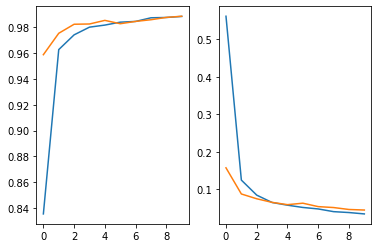

In [9]:
cnn.TrainModel(data_train, labels_train, data_test, labels_test, parameters, input_shape)

# ----------------------END of Pratice------------------

# Section 1 - CNN's

Fill in the model:
* Input: 28x28x1 grayscale image (1 specifies single channel grayscale).
* 1st hidden: 2D convolutional layer with 256 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 128 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: Flatten layer to map 2D to 1D vector.
* 6th hidden: Dense layer of 100 perceptrons.
* 7th hidden: Dense layer of 100 perceptrons.
* Output: 10 perceptrons for classification.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br>  Train for 200 epochs**

## 1.1 Overfitting 

In [28]:
#Create and train model architecture
def CNN_overfit():
    model = Sequential()
    #model.add(InputLayer(input_shape=input_shape))
    model.add(Conv2D(256, kernel_size=(3,3), input_shape=input_shape,activation=tf.nn.relu))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3,3),activation=tf.nn.relu))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(Dense(100,activation=tf.nn.relu))
    model.add(Dense(100,activation=tf.nn.relu))
    model.add(Dense(10,activation=tf.nn.softmax))
    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    
    #### Fill in Model ####
    
    return model
#Compile and train the model
CNN_overfit = CNN_overfit()
CNN_overfit.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_overfit = CNN_overfit.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=10, batch_size=1000,shuffle=True)
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 44s 738us/sample - loss: 0.5439 - accuracy: 0.8441 - val_loss: 0.1202 - val_accuracy: 0.9639
Epoch 2/10
60000/60000 [==============================] - 38s 628us/sample - loss: 0.0947 - accuracy: 0.9714 - val_loss: 0.0648 - val_accuracy: 0.9803
Epoch 3/10
60000/60000 [==============================] - 38s 628us/sample - loss: 0.0622 - accuracy: 0.9809 - val_loss: 0.0477 - val_accuracy: 0.9848
Epoch 4/10
60000/60000 [==============================] - 38s 628us/sample - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.0439 - val_accuracy: 0.9854
Epoch 5/10
60000/60000 [==============================] - 38s 628us/sample - loss: 0.0372 - accuracy: 0.9889 - val_loss: 0.0321 - val_accuracy: 0.9893
Epoch 6/10
60000/60000 [==============================] - 38s 629us/sample - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0363 - val_accuracy: 0.9878
Epoch 7/10
60000/60000 [====================

In [4]:
# Information contained in history dict.
print(history_overfit.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


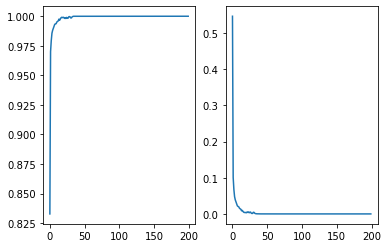

In [36]:
#Plot accuracy vs epoch
plt.subplot(121)
plt.plot(history_overfit.history['accuracy'])
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_overfit.history['loss'])
#### Fill in plot ####


Accuracy: 99.17%


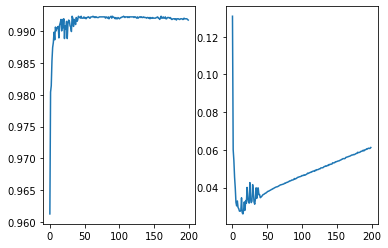

In [37]:
print("Accuracy: %.2f%%" %(scores[1]*100))

plt.subplot(121)
plt.plot(history_overfit.history['val_accuracy'])
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_overfit.history['val_loss'])

## 1.2 Improvements 

Using the network above, (1) insert a dropout of 30% between the input and first hidden layer. Run the model again and make note of the result. Next, (2 ) remove the dropout between input and hidden and add a dropout to each hidden layer except between softmax and output layer. Plot accuracy and loss only for (2). What do you observe for (2)?.

In [29]:
#Create and train model architecture
def CNN_dropout_hidden():
    
    #### Fill in model ####
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(Conv2D(256, kernel_size=(3,3),activation=tf.nn.relu))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3,3),activation=tf.nn.relu))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(Dense(100, activation=tf.nn.relu))
    model.add(Dense(100,activation=tf.nn.relu))
    model.add(Dense(10,activation=tf.nn.softmax))
    return model

#Compile and train the model
CNN_dropout_hidden = CNN_dropout_hidden()
CNN_dropout_hidden.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout_hidden = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=10,batch_size=1000,  shuffle=True)
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 38s 628us/sample - loss: 0.5484 - accuracy: 0.8348 - val_loss: 0.1684 - val_accuracy: 0.9583
Epoch 2/10
60000/60000 [==============================] - 38s 628us/sample - loss: 0.1260 - accuracy: 0.9613 - val_loss: 0.1082 - val_accuracy: 0.9716
Epoch 3/10
60000/60000 [==============================] - 38s 628us/sample - loss: 0.0858 - accuracy: 0.9736 - val_loss: 0.0757 - val_accuracy: 0.9804
Epoch 4/10
60000/60000 [==============================] - 38s 628us/sample - loss: 0.0666 - accuracy: 0.9796 - val_loss: 0.0724 - val_accuracy: 0.9824
Epoch 5/10
60000/60000 [==============================] - 38s 627us/sample - loss: 0.0587 - accuracy: 0.9813 - val_loss: 0.0588 - val_accuracy: 0.9848
Epoch 6/10
60000/60000 [==============================] - 38s 629us/sample - loss: 0.0510 - accuracy: 0.9838 - val_loss: 0.0554 - val_accuracy: 0.9865
Epoch 7/10
60000/60000 [====================

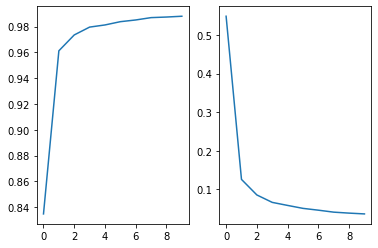

In [30]:
plt.subplot(121)
plt.plot(history_dropout_hidden.history['accuracy'])
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_dropout_hidden.history['loss'])
                                        

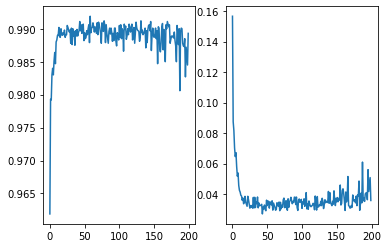

In [40]:
plt.subplot(121)
plt.plot(history_dropout_hidden.history['val_accuracy'])
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_dropout_hidden.history['val_loss'])


In [31]:
#Create and train model architecture
def CNN_dropout_hidden1():
    
    #### Fill in model ####
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    model.add(Conv2D(256, kernel_size=(3,3),activation=tf.nn.relu))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.3))
    model.add(Conv2D(128, kernel_size=(3,3),activation=tf.nn.relu))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.3))
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    #model.add(Dropout(0.3))
    model.add(Dense(100, activation=tf.nn.relu))
    model.add(Dropout(0.3))
    model.add(Dense(100,activation=tf.nn.relu))
    model.add(Dropout(0.3))
    model.add(Dense(10,activation=tf.nn.softmax))
    return model

#Compile and train the model
CNN_dropout_hidden1 = CNN_dropout_hidden1()
CNN_dropout_hidden1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout_hidden1 = CNN_dropout_hidden1.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=10, batch_size=1000, shuffle=True)
scores_dropout_hidden1 = CNN_dropout_hidden1.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden1[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 41s 682us/sample - loss: 0.7271 - accuracy: 0.7582 - val_loss: 0.1650 - val_accuracy: 0.9676
Epoch 2/10
60000/60000 [==============================] - 41s 677us/sample - loss: 0.1649 - accuracy: 0.9529 - val_loss: 0.0927 - val_accuracy: 0.9799
Epoch 3/10
60000/60000 [==============================] - 41s 679us/sample - loss: 0.1111 - accuracy: 0.9690 - val_loss: 0.0641 - val_accuracy: 0.9852
Epoch 4/10
60000/60000 [==============================] - 41s 679us/sample - loss: 0.0874 - accuracy: 0.9753 - val_loss: 0.0576 - val_accuracy: 0.9854
Epoch 5/10
60000/60000 [==============================] - 41s 680us/sample - loss: 0.0726 - accuracy: 0.9802 - val_loss: 0.0447 - val_accuracy: 0.9898
Epoch 6/10
60000/60000 [==============================] - 41s 678us/sample - loss: 0.0628 - accuracy: 0.9826 - val_loss: 0.0388 - val_accuracy: 0.9889
Epoch 7/10
60000/60000 [====================

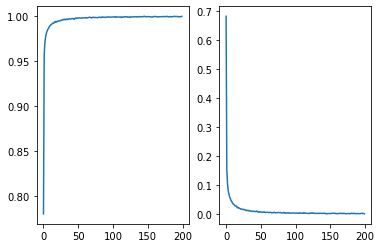

In [42]:
#Plot train/validation loss vs epoch
plt.subplot(121)
plt.plot(history_dropout_hidden1.history['accuracy'])
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_dropout_hidden1.history['loss'])
#### Fill in plot ####



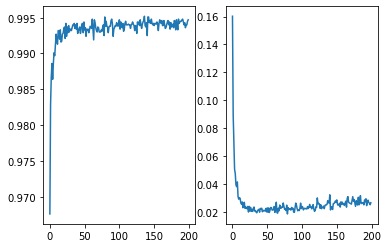

In [43]:
plt.subplot(121)
plt.plot(history_dropout_hidden1.history['val_accuracy'])
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_dropout_hidden1.history['val_loss'])

# Section 2- Autoencoders

## 2.1 Linear AE 

Fill in the model:
* Input: Flattened grayscale image to 28^2 = 784-dimensional vector.
* 1st hidden: 400 perceptrons.
* 2nd hidden: 200 perceptrons.
* 3rd hidden: 100 perceptrons.
* 4th hidden: 200 perceptrons.
* 5th hidden: 400 perceptrons.
* Output: 784 perceptrons.
<br>**Train for 150 epochs**

In [32]:
#Reshape training and testing data
data_train_reshape_fcae = data_train.reshape(data_train.shape[0], 28* 28)
data_test_reshape_fcae = data_test.reshape(data_test.shape[0],28*28)


In [33]:
# Create autoencoder architecture
def deep_ae():
    model = tf.keras.models.Sequential()
    
    # Encoder
    #model.add(Flatten())
    model.add(Dense(400,input_dim=28*28))
    model.add(Dense(200))
    model.add(Dense(100))
   
    #### Fill in the model ####
    
    # Decoder
    model.add(Dense(200))
    model.add(Dense(400))
    model.add(Dense(784))
    #### Fill in the model ####
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
deep_ae = deep_ae()
deep_ae.compile(loss='mean_squared_error', optimizer='adam')
history_deep_ae = deep_ae.fit(data_train_reshape_fcae, data_train_reshape_fcae, validation_data=(data_test_reshape_fcae, data_test_reshape_fcae), epochs=10,  shuffle=True)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 173us/sample - loss: 0.0107 - val_loss: 0.0071
Epoch 2/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0068 - val_loss: 0.0066
Epoch 3/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.0068 - val_loss: 0.0067
Epoch 4/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.0068 - val_loss: 0.0063
Epoch 5/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.0067 - val_loss: 0.0067
Epoch 6/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 7/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.0066 - val_loss: 0.0062
Epoch 8/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.0065 - val_loss: 0.0064
Epoch 9/10
60000/60000 [==============================] - 10s 170us/sample - l

In [12]:
decoded_data = deep_ae.predict(data_test_reshape_fcae)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output])
deep_ae_hl = get_hl([data_test_reshape_fcae])[0]

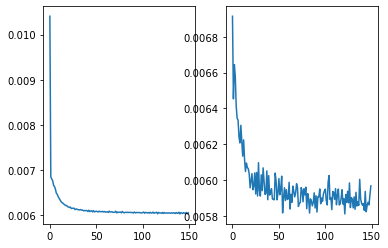

In [11]:
#Plot train/validation loss vs epoch
plt.subplot(121)
plt.plot(history_deep_ae.history['loss'])
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_deep_ae.history['val_loss'])
#### Fill in the plot ####

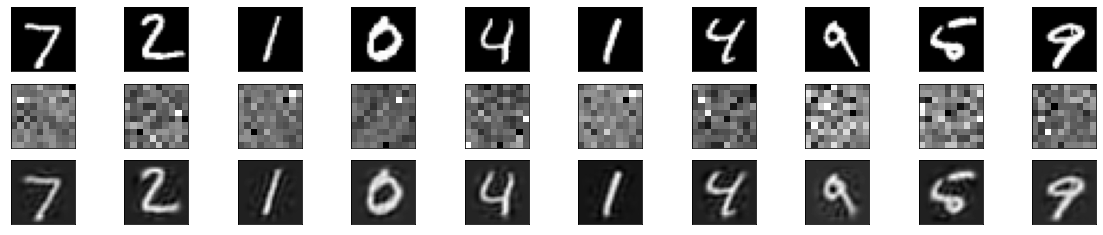

In [13]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_fcae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.2 Convolutional AE 

Fill in the model:
* Input: 28x28x1 grayscale image.
* 1st hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 6th hidden: A 2x2 upsample layer.
* 7th hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 8th hidden: A 2x2 upsample layer.
* Output: A convolutional layer with a single feature map and 3x3 filters.
<br>**All experiments with dropout set at 30%. Train for 200 epochs**

In [34]:
#Reshape data to account for grayscale channel in each image
data_train_reshape_cae = data_train
data_test_reshape_cae = data_test

data_train.shape



(60000, 28, 28, 1)

In [35]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3,3), input_shape=(28,28,1),padding="same"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(8, kernel_size=(3,3),padding="same"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(8, kernel_size=(3,3),padding="same"))
    model.add(Dropout(0.3))
    model.add(UpSampling2D(size=(2,2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(16, kernel_size=(3,3),padding="same"))
    model.add(Dropout(0.3))
    model.add(UpSampling2D(size=(2,2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(1, kernel_size=(3,3),padding="same"))
    #Encoder
    
    #### Fill in model ####

    #Decoder
    
    #### Fill in model ####
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
conv_ae = cae()
print(conv_ae.summary())
conv_ae.compile(loss='mean_squared_error', optimizer='adam')
history_conv_ae = conv_ae.fit(data_train_reshape_cae, data_train_reshape_cae, validation_data=(data_test_reshape_cae, data_test_reshape_cae), epochs=10, shuffle=True)
decoded_data = conv_ae.predict(data_test_reshape_cae)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
conv_ae_hl = get_hl([data_test_reshape_cae])[0]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 8)          

In [36]:
decoded_data = conv_ae.predict(data_test_reshape_cae)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
conv_ae_hl = get_hl([data_test_reshape_cae])[0]
conv_ae_hl.shape

(10000, 14, 14, 16)

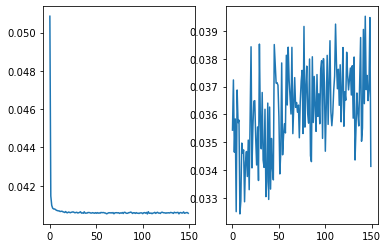

In [32]:
#Plot train/validation loss vs epoch
plt.subplot(121)
plt.plot(history_conv_ae.history['loss'])
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_conv_ae.history['val_loss'])
#### Fill in the plot ####

<Figure size 432x288 with 0 Axes>

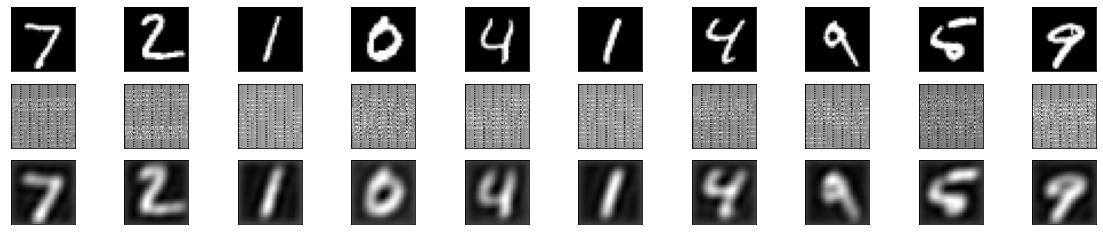

In [38]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_cae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(conv_ae_hl[i].reshape(56, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.3 Machine Anomaly Detection

At this point you have enough starter code to 
Using the dataset provided **create the autoencdoer model** you deem necessary to achieve better than 75 true positives (TP = 75) where a true instance is an anomaly.
Or detect all 143 if you can! Although anomaly 
detection thresholds can be set arbitrarily and various metrics
are used depending on the problem, we will set ours at 2 
standard deviations from the mean of "normal" data to judge TP's. Use the code provided at the bottom for calculating true positives and histogramming. 

In [1]:
#### Restart your kernal and run from here to clear some memory
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
tf.keras.backend.set_floatx('float64')

import sys
from os import listdir
from os.path import isfile, join

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, UpSampling2D


In [23]:
ls

ECE228_GPU_AE_STUDENT.ipynb  ex_normalspec.npy  training_data.npy
ex_abnormspec.npy            test_data.npy


#### Example spectrograms

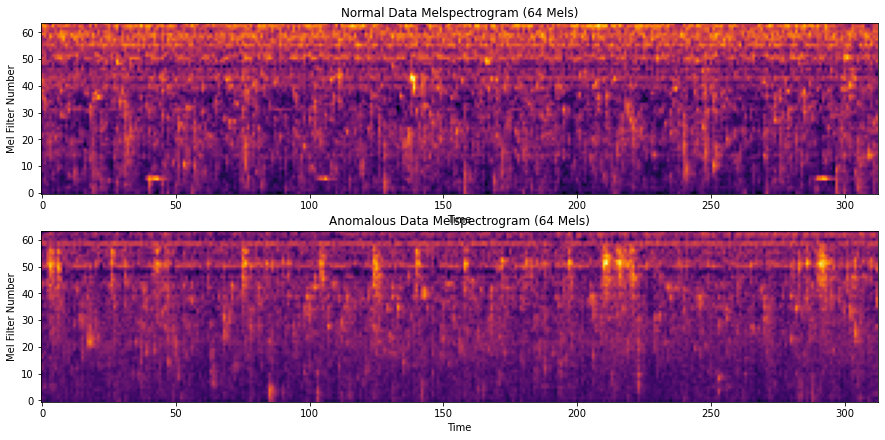

In [2]:
#### Load melspectrograms
ex_norm  = np.load('./ex_normalspec.npy')
ex_anom = np.load('./ex_abnormspec.npy')

plt.figure(figsize=(15,7))
plt.subplot(211)
plt.imshow(ex_norm[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Normal Data Melspectrogram (64 Mels)') 

plt.subplot(212)
plt.imshow(ex_anom[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Anomalous Data Melspectrogram (64 Mels)') 
plt.show()

In [30]:
ex_norm.shape

(8, 64, 313)

#### General template, up to this point, for constructing your deep learning model 
1. Set up the data (reshape, scale, etc...
2. Initialize a loss function
3. Compile a model
4. Train a model

In [3]:
# Load data
train  = np.load('/datasets/home/21/321/ee228sp20ta1/Anomaly/training_data.npy')
test= np.load('/datasets/home/21/321/ee228sp20ta1/Anomaly/test_data.npy')

print(np.amin(train),np.amax(train))
print(np.amin(test),np.amax(test))

-13.81806468963623 35.248191833496094
-12.935134887695312 42.32498550415039


In [4]:
max=np.amax(train)
min=np.amin(train)
train = ( train - np.amin(train) )/( np.amax(train) - np.amin(train) )
print(np.amin(train),np.amax(train))

test = ( test - min )/( max - min )
print(np.amin(test),np.amax(test))

0.0 1.0
0.01799464366156933 1.1442293374738695


In [5]:
x_train, x_valid = train_test_split(train[:1000],
                                   train_size=0.8,
                                   random_state=42,
                                   shuffle=True)



x_train = x_train[:,0,:,:312].copy()
x_valid = x_valid[:,0,:,:312].copy()
test=test[:,0,:,:312].copy()
train=train[:,0,:,:312].copy()




#x_train = data_train.reshape(data_train.shape[0], 28, 28, 1)
#test = data_test.reshape(data_test.shape[0], 28, 28, 1)

print(x_train.shape)
print(x_valid.shape)

#input_shape=(312,1)

#x_train = data_train.astype('float32')
#test = data_test.astype('float32')





(800, 64, 312)
(200, 64, 312)


In [6]:
x_train = x_train.reshape(800* 64,312)
x_valid = x_valid.reshape(200* 64,312)
test = test.reshape(143*64,312)
train =train.reshape(1000*64,312)

print(x_train.shape)
print(x_valid.shape)
print(train.shape)
print(test.shape)

(51200, 312)
(12800, 312)
(64000, 312)
(9152, 312)


In [20]:
# Create your own Baseline autoencoder
# Model name is fixed for use by later code

def autoencoderBASE():
 #### Fill in model ####
    model = Sequential()
    model.add(Dense(150, activation=tf.nn.relu,input_dim=312))
    model.add(Dense(80,activation=tf.nn.softmax))
    model.add(Dense(40))
    model.add(Dense(80, activation=tf.nn.softmax))
    model.add(Dense(150,activation=tf.nn.relu))
    model.add(Dense(312))
    return model


#autoencoderBASE = tf.keras.models.Sequential([
#### Fill in your model #####
 #layers.Dense(1000,activation="relu"),
 #layers.Dense(500,activation="relu"),
 #layers.Dense(200),
 #layers.Dense(500,activation="relu"),
 #layers.Dense(1000,activation="relu"),
#])
autoencoderBASE = autoencoderBASE()
autoencoderBASE.compile(loss='mse', optimizer='adam')
history_autoencoderBASE = autoencoderBASE.fit(x_train, x_train, validation_data=(x_valid,x_valid), epochs=10, batch_size=1000, shuffle=True)



Train on 51200 samples, validate on 12800 samples
Epoch 1/10
51200/51200 [==============================] - 1s 24us/sample - loss: 0.0935 - val_loss: 0.0120
Epoch 2/10
51200/51200 [==============================] - 0s 10us/sample - loss: 0.0106 - val_loss: 0.0100
Epoch 3/10
51200/51200 [==============================] - 0s 10us/sample - loss: 0.0100 - val_loss: 0.0100
Epoch 4/10
51200/51200 [==============================] - 1s 10us/sample - loss: 0.0100 - val_loss: 0.0100
Epoch 5/10
51200/51200 [==============================] - 1s 10us/sample - loss: 0.0099 - val_loss: 0.0098
Epoch 6/10
51200/51200 [==============================] - 0s 10us/sample - loss: 0.0094 - val_loss: 0.0087
Epoch 7/10
51200/51200 [==============================] - 0s 9us/sample - loss: 0.0062 - val_loss: 0.0049
Epoch 8/10
51200/51200 [==============================] - 0s 9us/sample - loss: 0.0049 - val_loss: 0.0047
Epoch 9/10
51200/51200 [==============================] - 0s 10us/sample - loss: 0.0047 - val_lo

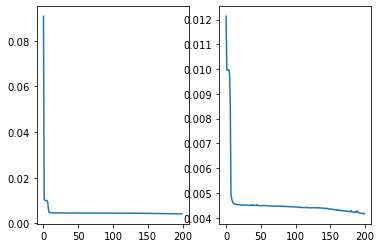

In [19]:
# Plot loss versus epoch.
plt.subplot(121)
plt.plot(history_autoencoderBASE.history['loss'])
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_autoencoderBASE.history['val_loss'])

The mean of normal data is 0.0047        and standard deviation is 0.0004


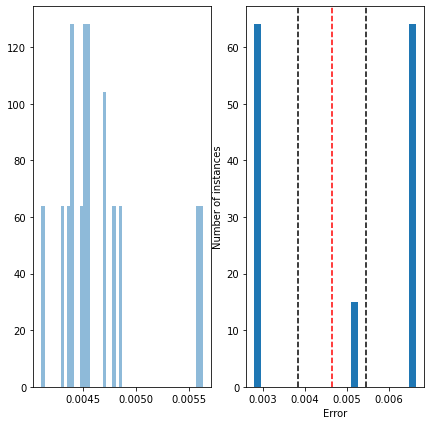

In [14]:
######### This code should remain untouched as much as possible,
#### except where your variable names for loss function or data set are needed.
#### This code feeds your data through the trained network to get mean and std
#### If you did not use a validation set then only use
#### your training data. Concatenating is therefore un-needed.
#### lossFunction <- Your loss function's name or use this one. Your choice of loss function.
##############################################################################################
lossFunction = tf.keras.losses.MeanSquaredError()

norm_list = []
dataset = (tf.data.Dataset.from_tensor_slices(train)).batch(64)

#### your code... training or train/valid if used #####))
for i, instance in dataset.enumerate():
    ae_predictions = autoencoderBASE(instance).numpy()
    norm_list.append(lossFunction(instance, ae_predictions).numpy())
# Feed the anomaly data through to get its error
anom_list = []
anomset = (tf.data.Dataset.from_tensor_slices(test)).batch(64)
#### test data #####))
for i, instance in anomset.enumerate():
    ae_predictions = autoencoderBASE(instance).numpy()
    anom_list.append(lossFunction(instance, ae_predictions).numpy())
    
normal_data_ERRORs = np.array(norm_list)
abnormal_data_ERRORs = np.array(anom_list)
######################### Code for presenting true positives to Question 2.3 ################## 
threshold = 2.0
mean = normal_data_ERRORs.mean()
std = normal_data_ERRORs.std()
print(f'The mean of normal data is {mean:.4f}\
        and standard deviation is {std :.4f}')
upperbound = mean+threshold*std
lowerbound = mean-threshold*std
plt.figure(figsize=(7,7))
plt.title('Error Histogram\'s')
plt.subplot(121)
plt.hist(normal_data_ERRORs, bins=50, alpha=0.5)
plt.subplot(122)
plt.hist(abnormal_data_ERRORs, bins=25, alpha=1.0)
plt.axvline(mean,ls='--', c='r')
plt.axvline(lowerbound, ls='--',c='k')
plt.axvline(upperbound, ls='--',c='k')
plt.xlabel('Error')
plt.ylabel('Number of instances')
plt.show()

In [15]:
print(mean*(35.248191833496094+13.81806468963623 ))
print(std*(35.248191833496094+13.81806468963623))

#mean: 0.11092590653946617
#std: 0.04790190788045684

0.22840047345847692
0.019930214503169244


In [17]:
tp_count = (np.sum(abnormal_data_ERRORs >= upperbound) +\
           np.sum(abnormal_data_ERRORs <= lowerbound))
fn_count = 143 - tp_count
fp_count = (np.sum(normal_data_ERRORs >= upperbound)+\
           np.sum(normal_data_ERRORs <= lowerbound)) 
tn_count =1000 - fp_count

print(f'TP {tp_count} \t FP {fp_count}')
print(f'FN {fn_count} \t TN {tn_count}')

# TP 128 FP 128
# FN: 15 TN 872

TP 128 	 FP 128
FN 15 	 TN 872
